In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
class KMeans():
    def __init__(self, K, max_iters, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
         
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Optimize clusters
        for _ in range(self.max_iters):
            # create clusters
            self.clusters = self.createclusters(self.centroids)
            if self.plot_steps:
                self.plot()
                
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self.getcentroids(self.clusters)
            
            # check if clusters have changed
            if self.converged(centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
                
        # Classify samples as the index of their clusters
        return self.getclusterlabels(self.clusters)
    
    def getclusterlabels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    
    def createclusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closestcentroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def closestcentroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    
    def getcentroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
            print(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)
        plt.show()
        
    def cent(self):
        return self.centroids

# holi_festival

Text(0.5, 1.0, 'Original image')

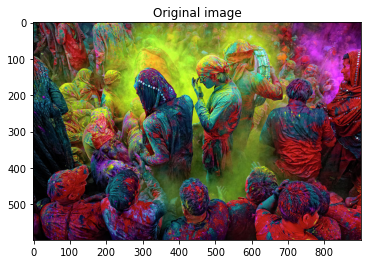

In [4]:
img_festival=cv2.imread(r"D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\2\\holi-festival.jpg")
plt.imshow(img_festival)
img_festival=cv2.cvtColor(img_festival,cv2.COLOR_BGR2RGB)
plt.imshow(img_festival)
plt.title('Original image')

In [5]:
pixel_values = img_festival.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(538200, 3)


#### K=2 holi_festival

In [6]:
k = KMeans(K=2, max_iters=2)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1])

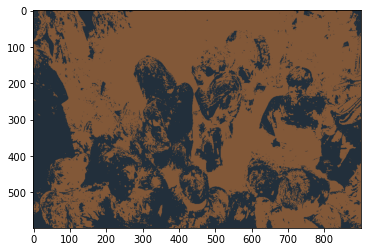

In [14]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=3 holi_festival

In [82]:
k = KMeans(K=3, max_iters=2)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

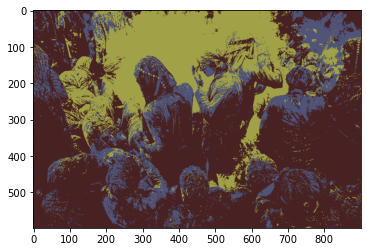

In [84]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=4 holi_festival

In [85]:
k = KMeans(K=4, max_iters=2)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3])

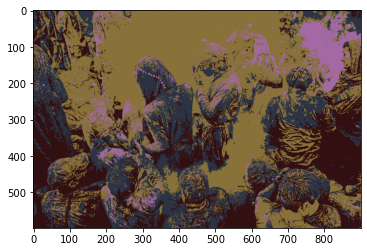

In [86]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=5 holi_festival

In [88]:
k = KMeans(K=5, max_iters=2)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4])

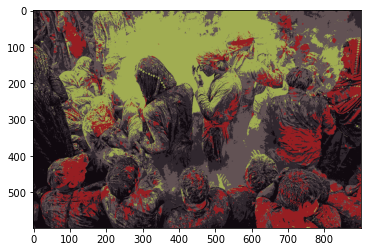

In [89]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=6 holi_festival

In [90]:
k = KMeans(K=6, max_iters=2)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

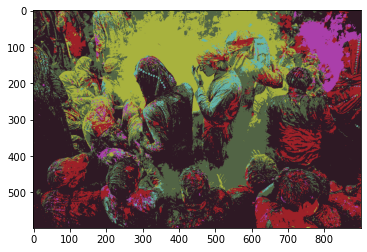

In [91]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=10 holi_festival

In [96]:
k = KMeans(K=10, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

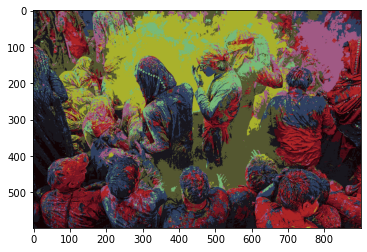

In [97]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=15 holi_festival

In [98]:
k = KMeans(K=15, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

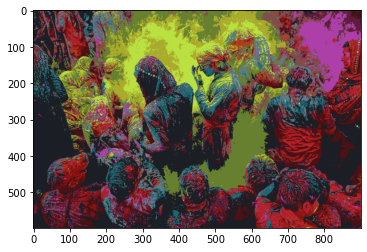

In [99]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

#### K=20 holi_festival

In [100]:
k = KMeans(K=20, max_iters=5)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

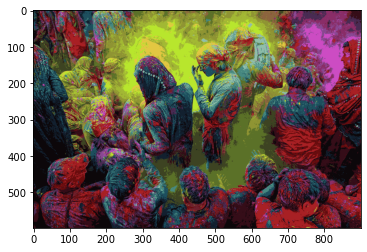

In [101]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_festival.shape)
plt.imshow(segmented_image)
plt.show()

# car

Text(0.5, 1.0, 'Original image')

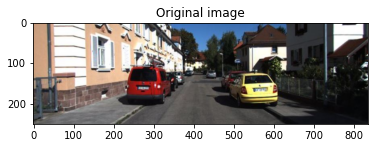

In [149]:
img_car=cv2.imread(r"D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\2\\car.jpg")
img_car=cv2.cvtColor(img_car,cv2.COLOR_BGR2RGB)
plt.imshow(img_car)
plt.title('Original image')

In [153]:
pixel_values = img_car.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
pixel_values.shape

(209585, 3)

#### K=2 

In [157]:
k = KMeans(K=2, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1])

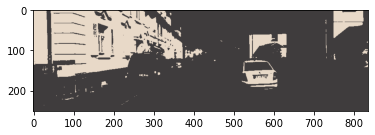

In [158]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=3

In [159]:
k = KMeans(K=3, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

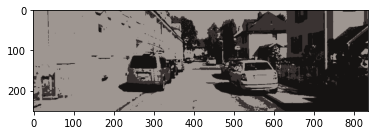

In [160]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=4

In [161]:
k = KMeans(K=4, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3])

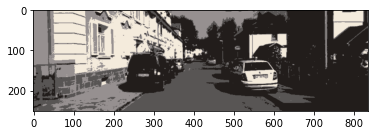

In [162]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=5

In [163]:
k = KMeans(K=5, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4])

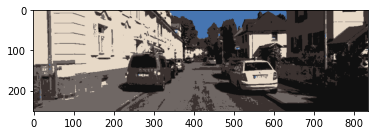

In [164]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=6

In [165]:
k = KMeans(K=6, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

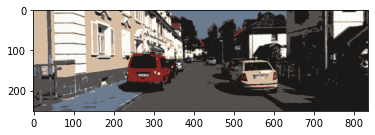

In [166]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=10

In [177]:
k = KMeans(K=10, max_iters=3)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

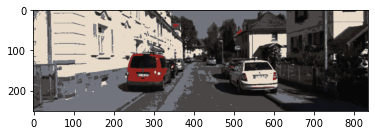

In [176]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=15

In [169]:
k = KMeans(K=15, max_iters=4)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

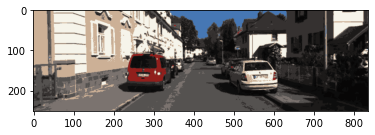

In [178]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

### k=20

In [ ]:
k = KMeans(K=20, max_iters=10)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

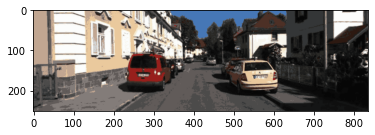

In [182]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_car.shape)
plt.imshow(segmented_image)
plt.show()

# bird

Text(0.5, 1.0, 'Original image')

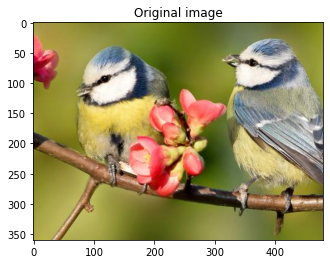

In [184]:
img_bird=cv2.imread(r"D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\2\\bird.jpg")
img_bird=cv2.cvtColor(img_bird,cv2.COLOR_BGR2RGB)
plt.imshow(img_bird)
plt.title('Original image')

In [185]:
pixel_values = img_bird.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
pixel_values.shape

(172800, 3)

### k=2

In [186]:
k = KMeans(K=2, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1])

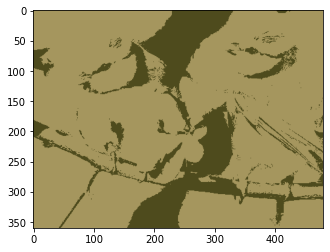

In [188]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=3

In [189]:
k = KMeans(K=3, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2])

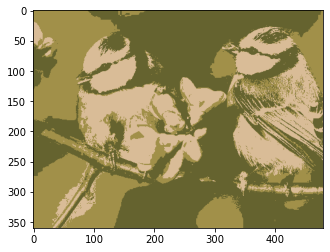

In [190]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=4

In [191]:
k = KMeans(K=4, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3])

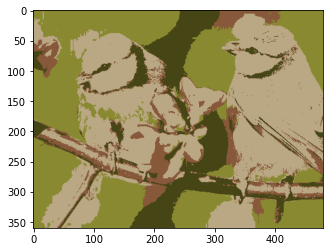

In [192]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=5

In [193]:
k = KMeans(K=5, max_iters=1)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4])

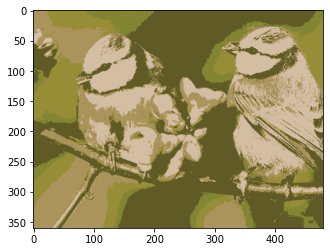

In [195]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=6

In [199]:
k = KMeans(K=6, max_iters=3)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

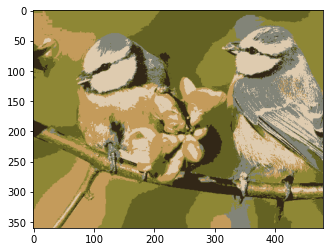

In [200]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=10

In [201]:
k = KMeans(K=10, max_iters=5)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

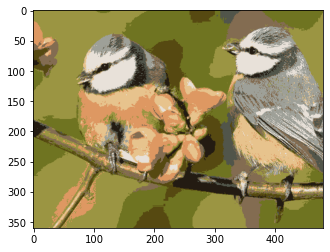

In [202]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=15

In [203]:
k = KMeans(K=15, max_iters=7)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

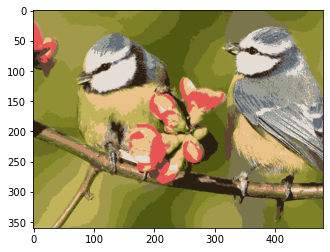

In [204]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()

### k=20

In [205]:
k = KMeans(K=20, max_iters=9)  
y_pred = k.predict(pixel_values) 
centers = np.uint8(k.cent())
y_pred = y_pred.astype(int)
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

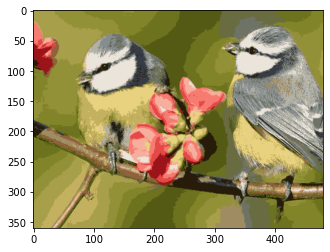

In [206]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_bird.shape)
plt.imshow(segmented_image)
plt.show()